# Raman Figure Generation
Tyler Biggs

##### Import needed Python packages

In [1]:
import matplotlib
# matplotlib.use('Agg')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import itertools
import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib notebook

/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Select Matplotlib backend

## Import Data

In [3]:
path = 'data/raman_data.csv'
raman_df = pd.read_csv(path)
raman_df.head()

,Al_conc,peak_wavelength,OH_conc,counter_ion,deg_C,citation_ref
0,3.0,539.10,1.6,Cs+,25,sipos_2006_table_1
1,3.0,621.16,1.6,Cs+,25,sipos_2006_table_2
2,3.0,538.11,2.2,Cs+,25,sipos_2006_table_3
3,3.0,620.77,2.2,Cs+,25,sipos_2006_table_4
4,3.0,537.78,2.8,Cs+,25,sipos_2006_table_5


In [4]:
len(raman_df)

54

## Create Color maps

In [5]:
# Create a matplotlib colormap.
cmap = sns.light_palette('red', reverse=False, as_cmap=True)

# Normalize to the range of values found within Al concentration.
Al_norm = matplotlib.colors.Normalize(
    vmin=raman_df['Al_conc'].min(),
    vmax=raman_df['Al_conc'].max()
)

OH_norm = matplotlib.colors.Normalize(
    vmin=raman_df['OH_conc'].min(),
    vmax=raman_df['OH_conc'].max()
)

Al_OH_colors = dict()
OH_Al_colors = dict()

for index, row in raman_df.iterrows():
    Al_OH_colors.update({row['OH_conc']: cmap(Al_norm(row['Al_conc']))})
    OH_Al_colors.update({row['Al_conc']: cmap(OH_norm(row['OH_conc']))})

## Cut Data up by wavelength

In [6]:
# Try the default output of pd.cut()
raman_df['peak_cut'] = pd.cut(
    raman_df['peak_wavelength'], 
    3,
    labels=['low', 'med', 'high']
)

In [7]:
# Define data subsets.
low = raman_df[(raman_df['peak_cut'] == 'low')]
med = raman_df[(raman_df['peak_cut'] == 'med')]
high= raman_df[(raman_df['peak_cut'] == 'high')]
raman_df.head()

,Al_conc,peak_wavelength,OH_conc,counter_ion,deg_C,citation_ref,peak_cut
0,3.0,539.10,1.6,Cs+,25,sipos_2006_table_1,low
1,3.0,621.16,1.6,Cs+,25,sipos_2006_table_2,med
2,3.0,538.11,2.2,Cs+,25,sipos_2006_table_3,low
3,3.0,620.77,2.2,Cs+,25,sipos_2006_table_4,med
4,3.0,537.78,2.8,Cs+,25,sipos_2006_table_5,low


# Exploratory Plots

<IPython.core.display.Javascript object>


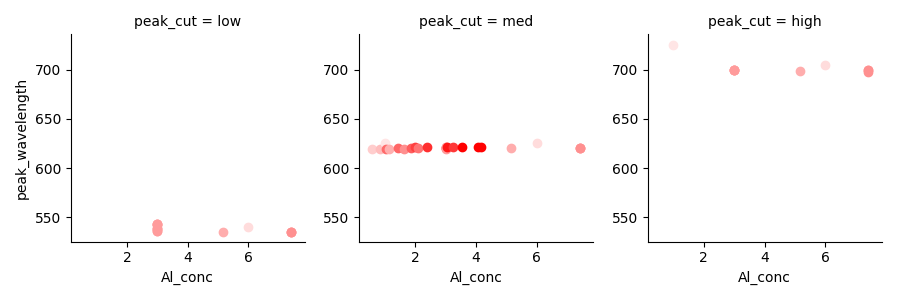

In [8]:
g = sns.FacetGrid(
    data=raman_df,
    hue='Al_conc',
    col='peak_cut',
    palette=OH_Al_colors
)
g = g.map(
    plt.scatter,
    'Al_conc',
    'peak_wavelength'
)

<IPython.core.display.Javascript object>


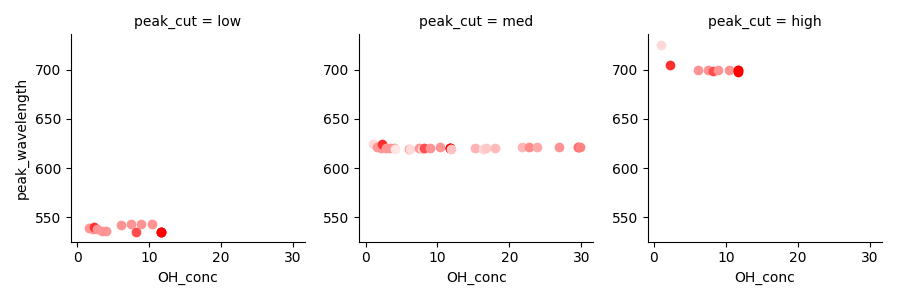

In [9]:
g = sns.FacetGrid(
    data=raman_df,
    hue='OH_conc',
    col='peak_cut',
    palette=Al_OH_colors
)
g = g.map(
    plt.scatter,
    'OH_conc',
    'peak_wavelength'
)

## 3D Plots

<IPython.core.display.Javascript object>


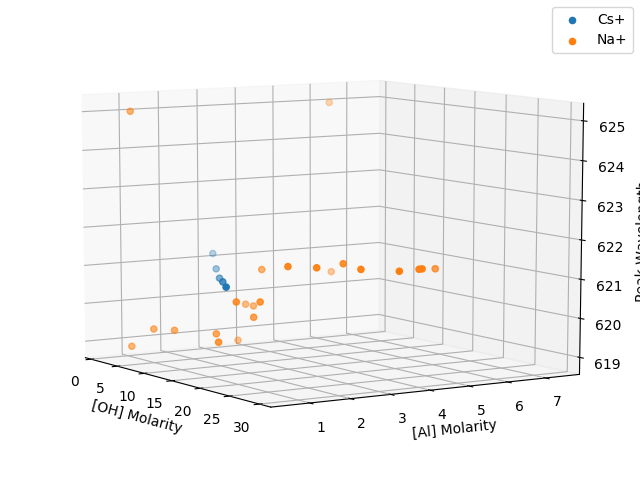

/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [10]:
fig = plt.figure()
ax = Axes3D(fig)

for ii, xx in enumerate(med.counter_ion.unique()):
    curr = med[(raman_df.counter_ion == xx)]
    ax.scatter(xs=curr.OH_conc, ys=curr.Al_conc, zs=curr.peak_wavelength,
        label=xx)

ax.set_xlabel('[OH] Molarity')
ax.set_ylabel('[Al] Molarity')
ax.set_zlabel('Peak Wavelength')
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


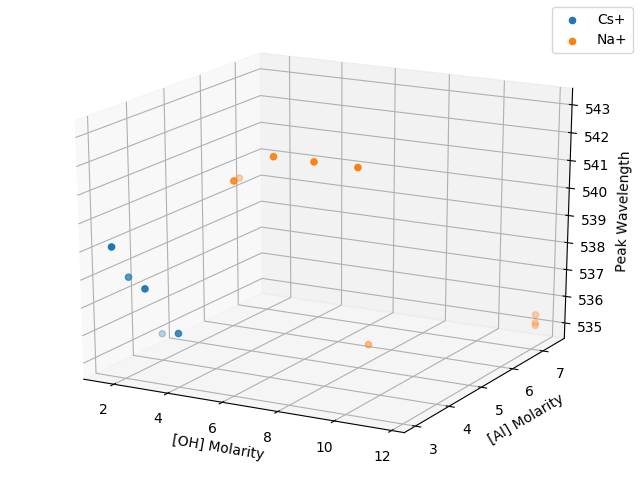

/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [11]:
fig = plt.figure()
ax = Axes3D(fig)

for ii, xx in enumerate(low.counter_ion.unique()):
    curr = low[(raman_df.counter_ion == xx)]
    ax.scatter(xs=curr.OH_conc, ys=curr.Al_conc, zs=curr.peak_wavelength,
        label=xx)

ax.set_xlabel('[OH] Molarity')
ax.set_ylabel('[Al] Molarity')
ax.set_zlabel('Peak Wavelength')
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


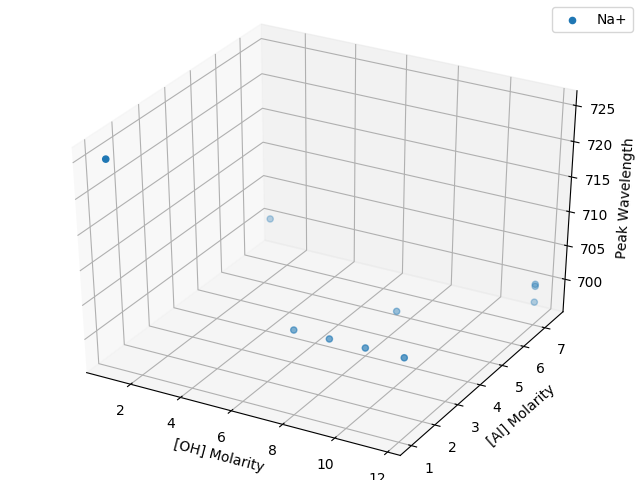

/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [12]:
fig = plt.figure()
ax = Axes3D(fig)

for ii, xx in enumerate(high.counter_ion.unique()):
    curr = high[(raman_df.counter_ion == xx)]
    ax.scatter(xs=curr.OH_conc, ys=curr.Al_conc, zs=curr.peak_wavelength,
        label=xx)

ax.set_xlabel('[OH] Molarity')
ax.set_ylabel('[Al] Molarity')
ax.set_zlabel('Peak Wavelength')
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


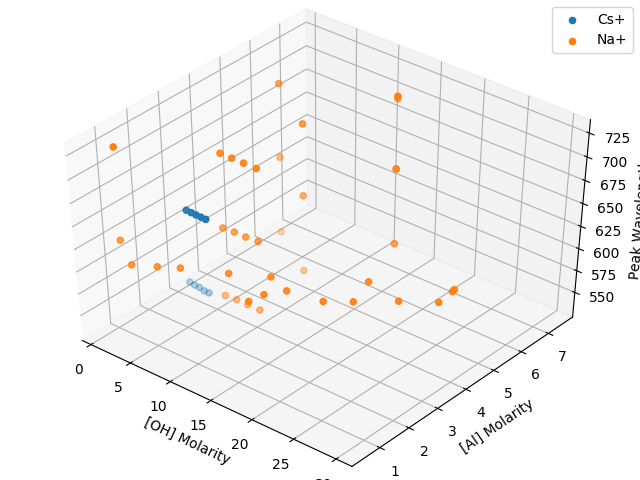

In [13]:
fig = plt.figure()
ax = Axes3D(fig)

for ii, xx in enumerate(raman_df.counter_ion.unique()):
    
    curr = raman_df[(raman_df.counter_ion == xx)]

    ax.scatter(
        xs=curr.OH_conc,
        ys=curr.Al_conc,
        zs=curr.peak_wavelength,
        label=xx
    )
    
ax.set_xlabel('[OH] Molarity')
ax.set_ylabel('[Al] Molarity')
ax.set_zlabel('Peak Wavelength')
ax.legend()
plt.show()

## Joint Plots

<IPython.core.display.Javascript object>


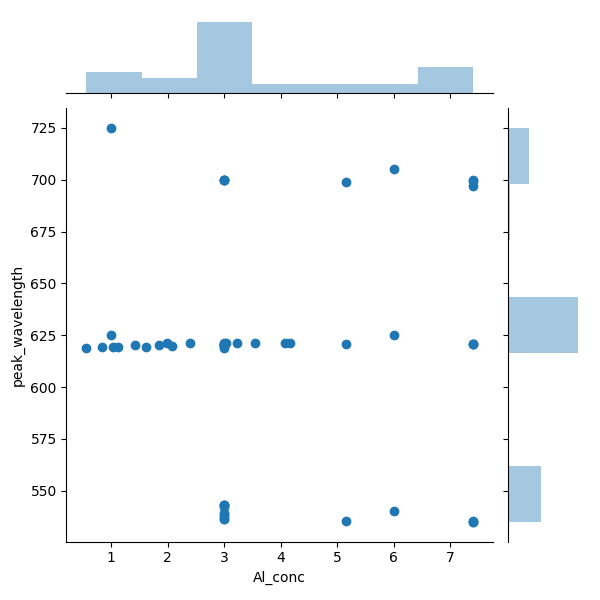

In [14]:
jp = sns.jointplot(
    x='Al_conc',
    y='peak_wavelength',
    data=raman_df,
#     palette=OH_Al_colors,
    stat_func=None)

<IPython.core.display.Javascript object>


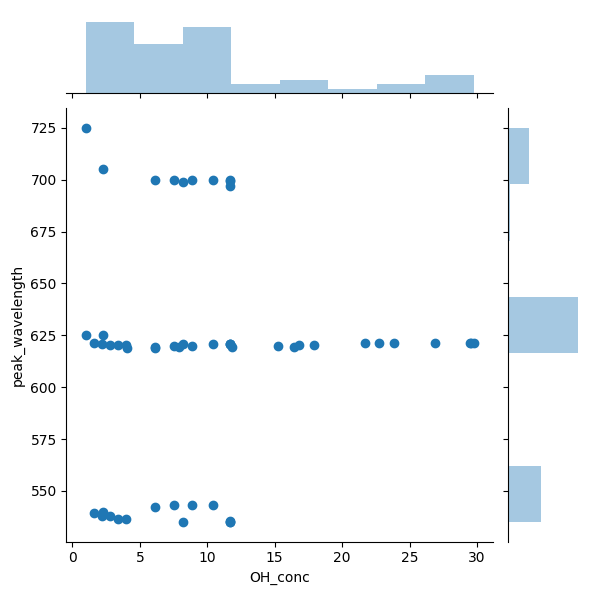

In [15]:
jp = sns.jointplot(
    x='OH_conc',
    y='peak_wavelength',
    data=raman_df,
    stat_func=None)

## Scatter Plots by Wavelength

To see a greater level of detail, examine the data by peak position.

<IPython.core.display.Javascript object>


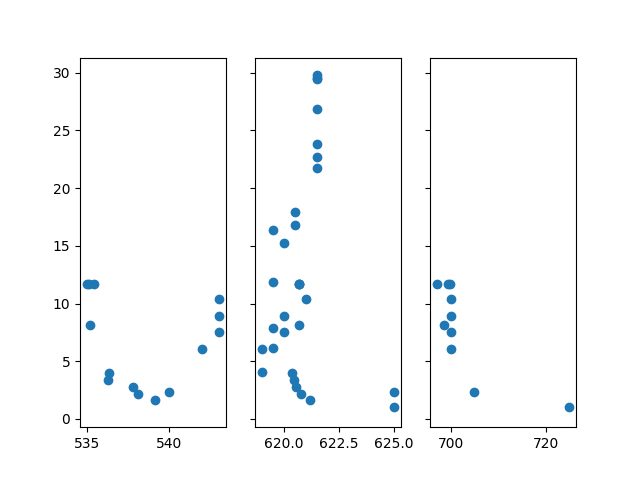

In [16]:
# plt.subplots returns a fig, axes object.
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1,
    ncols=3,
    sharex=False,
    sharey=True,
    squeeze=True,
    subplot_kw=None,
    gridspec_kw=None,
)

ax1.scatter(
    y=low['OH_conc'],
    x=low['peak_wavelength'],
)

ax2.scatter(
    y=med['OH_conc'],
    x=med['peak_wavelength'],
)

ax3.scatter(
    y=high['OH_conc'],
    x=high['peak_wavelength'],
)

# Create a new axis for the color bar.
# ax_cb = divider.new_horizontal(size="5%", pad=0.05)
# fig.add_axes(ax_cb)
# cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm, orientation='vertical')
# color_bar = matplotlib.colorbar.ColorbarBase(ax1)

<IPython.core.display.Javascript object>


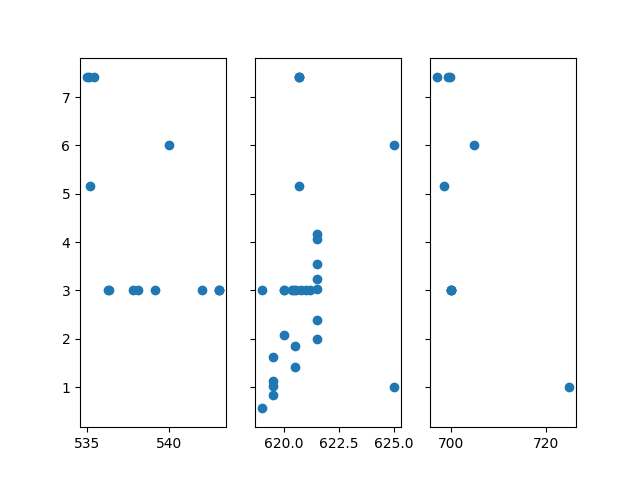

In [18]:
# plt.subplots returns a fig, axes object.
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1,
    ncols=3,
    sharex=False,
    sharey=True,
    squeeze=True,
    subplot_kw=None,
    gridspec_kw=None,
)

ax1.scatter(
    y=low['Al_conc'],
    x=low['peak_wavelength'],
)

ax2.scatter(
    y=med['Al_conc'],
    x=med['peak_wavelength'],
)

ax3.scatter(
    y=high['Al_conc'],
    x=high['peak_wavelength'],
)


<IPython.core.display.Javascript object>


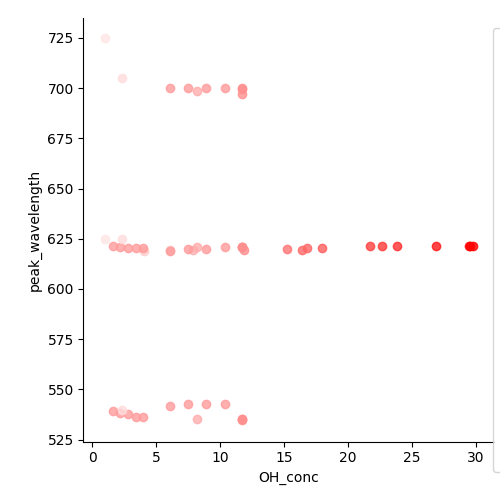

In [17]:
gg = sns.lmplot(
    x='OH_conc',
    y='peak_wavelength',
    hue='Al_conc',
    data=raman_df,
    fit_reg=False,
    palette=OH_Al_colors
)